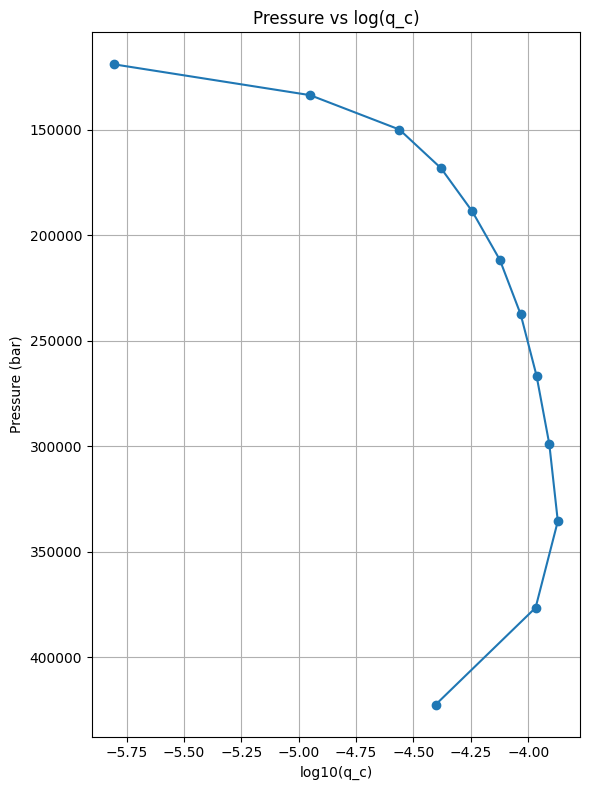

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

file_path = "/home/sansar1/Codes/cloud_model/output/voyager_frain1_sig2.out"
# Read numerical data from the file (skip header lines until the data starts)
data = []
with open(file_path, "r") as f:
    lines = f.readlines()
    for line in lines:
        parts = line.strip().split()
        if len(parts) == 8:  # only data lines have 8 columns
            data.append([float(x.replace("E", "e")) for x in parts])

# Convert to numpy array
data = np.array(data)

# Extract columns
pressure = data[:, 1]   # 2nd column = pressure
qc = data[:, 4]         # 5th column = q_c

# Filter out zero or negative q_c values (log undefined)
mask = qc > 0
pressure = pressure[mask]
qc = qc[mask]

# Plot Pressure vs log10(q_c)
plt.figure(figsize=(6, 8))
plt.plot(np.log10(qc), pressure, marker='o')

plt.gca().invert_yaxis()  # invert pressure axis
plt.xlabel("log10(q_c)")
plt.ylabel("Pressure (bar)")  # assuming pressure in bar (confirm units)
plt.title("Pressure vs log(q_c)")
plt.grid(True)
plt.tight_layout()
plt.show()


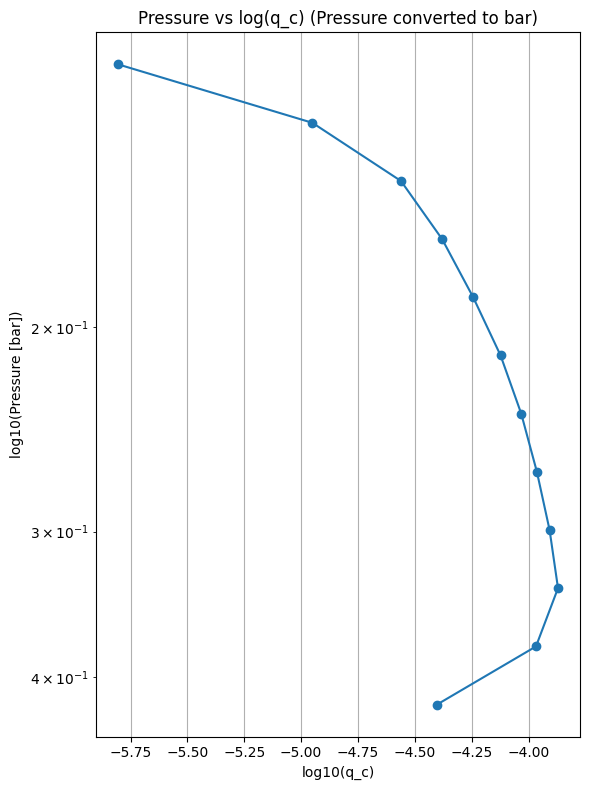

In [7]:
# Convert pressure from dyne/cm^2 to bar (1 bar = 1e6 dyne/cm^2)
pressure_bar = pressure * 1e-6  

# Take log10 of pressure (for y-axis plotting)
logP = np.log10(pressure_bar)

# Plot logP vs log10(q_c)
plt.figure(figsize=(6, 8))
plt.plot(np.log10(qc), pressure_bar, marker='o')

plt.gca().invert_yaxis()  # invert axis to match usual convention (high P at bottom)
plt.xlabel("log10(q_c)")
plt.ylabel("log10(Pressure [bar])")
plt.yscale('log')  # set y-axis to log scale
plt.title("Pressure vs log(q_c) (Pressure converted to bar)")
plt.grid(True)
plt.tight_layout()
plt.show()
